# Basic Image Procesisng in Julia

This post shows the basic image processing done in Julia language.

- toc: true 
- badges: true
- hide_binder_badge: true
- hide_deepnote_badge: true
- hide_colab_badge: true
- comments: true
- categories: [julia, Image processing]
- author: Omer

## Activating project environment
Every julia project can has it's own environment just as python.
In jupyter notebook, the environment can be activated by importing `Pkg` - a julia package management system

First, let's ensure we are in correct directory.

In [3]:
basename(pwd()) # the last part of the directory.

"Basic Image Processing"

This seems correct as I am hosting this code file in `Basic Image Processing` Folder. Now let's go ahead with activating the environment.

In [4]:
using Pkg
Pkg.activate(".")

  Activating project at `~/website/Julia_Projects/Basic Image Processing`


Now let's add required packages `Images` and `TestImages`  to this environment 

In [8]:
Pkg.add(["Images","TestImages"]); # add the Images package

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed StringDistances ─ v0.11.2
   Installed TestImages ────── v1.6.2
    Updating `~/website/Julia_Projects/Basic Image Processing/Project.toml`
  [5e47fb64] + TestImages v1.6.2
    Updating `~/website/Julia_Projects/Basic Image Processing/Manifest.toml`
  [88034a9c] + StringDistances v0.11.2
  [5e47fb64] + TestImages v1.6.2
Precompiling project...
  ✓ StringDistances
  ✓ TestImages
  2 dependencies successfully precompiled in 3 seconds (117 already precompiled)


## Importing Libraries

After setting up the environment, we now move to importing libraries.

In [6]:
using Images, TestImages

Now let's load test image `lighthouse.png`. The package `TestImages` conveniently provides us with many legacy test images from image processing domain.

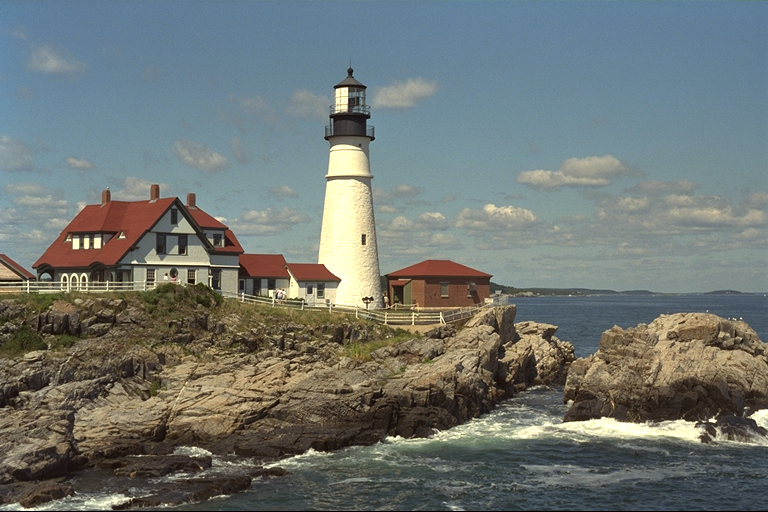

In [7]:
img = testimage("lighthouse.png")

In jupyter notebook, images will be displayed by default after loading. Now to see the image dimensions, let's use `size` function

In [8]:
size(img)

(512, 768)

The above output shows that light house image has a `width` of `768` pixels and a height of `height` of `512` pixels. Alternatively, we can also state that image has `512` rows and `768` columns. 

> Important : Following notation are analogous to each other. We frequently reference them in text interchangeably.

> Tip: image(height,width) $\rightarrow$ image(rows,cols) $\rightarrow$ image(1st dimension, 2nd dimension) $\rightarrow$ image(y,x) $\rightarrow$ image (argument 1, argument 2)

### Cropping of Image:
Images are treated as matrices. By providing indices, we can extract or display portion of the image. 

Let's consider a problem of cropping the light house from above picture. To do so, we need to provide correct indices range in image coordinate system

> Important: In image coordinate system, origin is top-left corner.

To provide a range in rows and column we use following notation

`rows[start index : stop index, start index : stop index]`

The `:` sign is showing the continuity, so for example `10:15` mean index value `10,11,12,13,14,15`

To extract the light house from above image, we provide the $y$/height (`50:350`) and $x$/width (`300:400`) coordinates

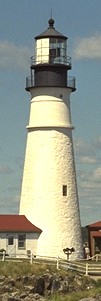

In [76]:
 img[50:350,300:400] # cropping lighthouse image

### Resizing image

We can also resize image easily. We simply supply ratio value.
- A ratio value of 0.5 means half of original size (`512 x 0.5`, `768 x 0.5`)
- A ratio value of 2 means double of original size (`512 x 2`, `768 x 2`)

In [19]:
img_rs = imresize(img, ratio = 0.5)
size(img_rs)

(256, 384)

### Rotation of image

We can also rotate image 

- 90 $\text{\textdegree}$ anti-clockwise rotation:       $-\pi$/2
- 45 $\text{\textdegree}$ anti-clockwise rotation:       $-\pi$/4
- 90 $\text{\textdegree}$ clockwise rotation:            $\pi$/2
- 45 $\text{\textdegree}$ clockwise rotation:            $\pi$/4


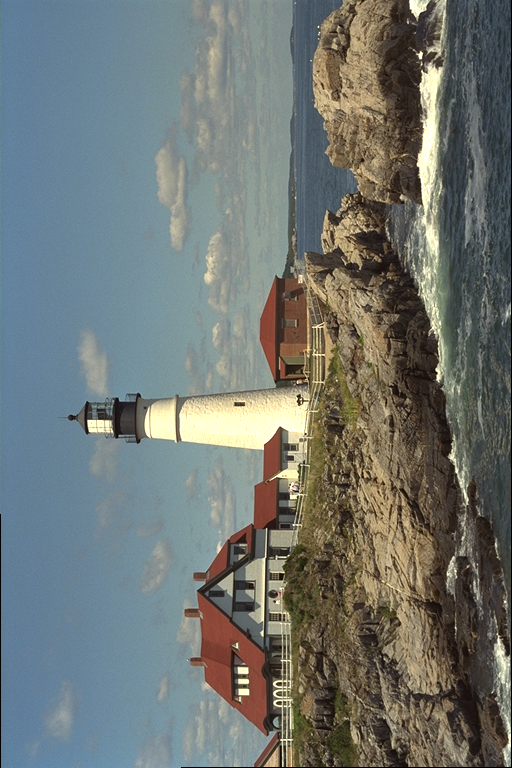

In [20]:
imrotate(img,-π/2)

> Tip: In julia `\pi` + `tab` translates to $\pi$

### Numeric value of pixel. 
If we want to see the numeric value of pixel (value of R,G,B) then we need to add a third argument as `:`. 

> Note: With only two arguments, the image is displayed and numeric values are not displayed (see [Cropping of Image](#cropping-of-image)). 

In [82]:
img[1:5,1:5,:] # adding third argument

5×5×1 Array{RGB{N0f8}, 3}:
[:, :, 1] =
 RGB(0.361, 0.486, 0.6)    …  RGB(0.369, 0.506, 0.616)
 RGB(0.361, 0.486, 0.6)       RGB(0.361, 0.498, 0.608)
 RGB(0.376, 0.514, 0.624)     RGB(0.369, 0.506, 0.616)
 RGB(0.365, 0.498, 0.62)      RGB(0.353, 0.49, 0.608)
 RGB(0.365, 0.498, 0.627)     RGB(0.365, 0.498, 0.62)

If we need to only inspect single pixel, we can use color channel names as follows

In [81]:
red(img[1,1]), green(img[1,1]), blue(img[1,1])

(0.361N0f8, 0.486N0f8, 0.6N0f8)

## Compatibility
> Note: This file was developed and tested with following version of Julia

In [1]:
VERSION

v"1.7.2"